<img src="logo-banner-ITESO.png">

___
# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Nombre: </Strong>  <font color="blue"> José Manuel Haces López </font>
- <Strong> Fecha: </Strong>02/09/2021
- <Strong> Correo: </Strong>  <font color="blue"> jose.haces@iteso.mx </font>
___


### <font color= #2E9AFE> Tarea 1: Descripción de conjuntos de datos</font>

El conjunto de datos “soybean data” puede encontrarse en el repositorio “UC Irvine Machine Learning Repository” (https://archive.ics.uci.edu/ml/datasets/Soybean+(Large)).

Los datos recolectados para predecir las enfermedades en 307 muestras de soja. Se cuentan con 35 predictores, los cuales la mayoría con categóricos y se incluye información de las condiciones ambientales y características de las plantas. La variable de salida consiste en 19 clases distintas de soja.
Utilizando el conjunto de datos mencionado, responda las siguientes preguntas.

En este trabajo se pretende recordar y llevar a cabo lo aprendido en la materia anterior "Laboratorio de Procesamiento de Datos", además de los nuevos consejos y conocimientos aprendidos hasta el momento.


## Resumen de lo que contiene los datos con los que trabajeremos.
1. **date:** april,may,june,july,august,september,october,?.
2. **plant-stand:** normal,lt-normal,?.
3. **precip:** lt-norm,norm,gt-norm,?.
4. **temp:** lt-norm,norm,gt-norm,?.
5. **hail:** yes,no,?.
6. **crop-hist:** diff-lst-year,same-lst-yr,same-lst-two-yrs,same-lst-sev-yrs,?.
7. **area-damaged:** scattered,low-areas,upper-areas,whole-field,?.
8. **severity:** minor,pot-severe,severe,?.
9. **seed-tmt:** none,fungicide,other,?.
10. **germination:** 90-100%,80-89%,lt-80%,?.
11. **plant-growth:** norm,abnorm,?.
12. **leaves:** norm,abnorm.
13. **leafspots-halo:** absent,yellow-halos,no-yellow-halos,?.
14. **leafspots-marg:** w-s-marg,no-w-s-marg,dna,?.
15. **leafspot-size:** lt-1/8,gt-1/8,dna,?.
16. **leaf-shread:** absent,present,?.
17. **leaf-malf:** absent,present,?.
18. **leaf-mild:** absent,upper-surf,lower-surf,?.
19. **stem:** norm,abnorm,?.
20. **lodging:** yes,no,?.
21. **stem-cankers:** absent,below-soil,above-soil,above-sec-nde,?.
22. **canker-lesion:** dna,brown,dk-brown-blk,tan,?.
23. **fruiting-bodies:** absent,present,?.
24. **external decay:** absent,firm-and-dry,watery,?.
25. **mycelium:** absent,present,?.
26. **int-discolor:** none,brown,black,?.
27. **sclerotia:** absent,present,?.
28. **fruit-pods:** norm,diseased,few-present,dna,?.
29. **fruit spots:** absent,colored,brown-w/blk-specks,distort,dna,?.
30. **seed:** norm,abnorm,?.
31. **mold-growth:** absent,present,?.
32. **seed-discolor:** absent,present,?.
33. **seed-size:** norm,lt-norm,?.
34. **shriveling:** absent,present,?.
35. **roots:** norm,rotted,galls-cysts,?.

## Desarrollo
- Hacemos una pequeña exploración de los datos para ver los datos con los que vamos a trabajar.

In [1]:
#Importar Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from statistics import mode

In [2]:
# Importamos nuestro archivo y lo cargamos en la memoria bajo el nombre de "data"

data = pd.read_csv('soybean-large.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [3]:
# Sacamos los dtypes de cada variable para ver cómo están conformadas

data.dtypes
dtyp = pd.DataFrame(data.dtypes,columns=['Tipo'])
dtyp

,Tipo
0,object
1,object
2,object
3,object
4,object
5,object
6,object
7,object
8,object
9,object


Podemos ver que la única variable que es de tipo entero es la '12', veamos el porqué.

### 1. En la descripción de UCI Machine Learning, dice que hay datos desconocidos de la forma "?". ¿Cómo reemplazarías esos datos?

In [4]:
# Veamos el número de valores únicos con los que cuenta cada variable

unival = pd.DataFrame(data.nunique(), columns=['Valores_Unicos'])
unival

,Valores_Unicos
0,19
1,8
2,3
3,4
4,4
5,3
6,5
7,5
8,4
9,4


In [5]:
# Guardamos las columnas de nuestra data

columnas = data.columns
columnas

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35],
           dtype='int64')

In [6]:
# Mostremos cuáles son los valores únicos de cada variable.

for i in range(len(columnas)):
    print(columnas[i], data[i].unique())

0 ['diaporthe-stem-canker' 'charcoal-rot' 'rhizoctonia-root-rot'
 'phytophthora-rot' 'brown-stem-rot' 'powdery-mildew' 'downy-mildew'
 'brown-spot' 'bacterial-blight' 'bacterial-pustule' 'purple-seed-stain'
 'anthracnose' 'phyllosticta-leaf-spot' 'alternarialeaf-spot'
 'frog-eye-leaf-spot' 'diaporthe-pod-&-stem-blight' 'cyst-nematode'
 '2-4-d-injury' 'herbicide-injury']
1 ['6' '4' '3' '5' '1' '0' '2' '?']
2 ['0' '1' '?']
3 ['2' '0' '1' '?']
4 ['1' '2' '0' '?']
5 ['0' '1' '?']
6 ['1' '2' '3' '0' '?']
7 ['1' '0' '3' '2' '?']
8 ['1' '2' '?' '0']
9 ['0' '1' '?' '2']
10 ['0' '1' '2' '?']
11 ['1' '0' '?']
12 [1 0]
13 ['0' '?' '2' '1']
14 ['2' '?' '0' '1']
15 ['2' '?' '1' '0']
16 ['0' '?' '1']
17 ['0' '?' '1']
18 ['0' '?' '1' '2']
19 ['1' '0' '?']
20 ['1' '0' '?']
21 ['3' '0' '1' '2' '?']
22 ['1' '0' '3' '2' '?']
23 ['1' '0' '?']
24 ['1' '0' '?']
25 ['0' '1' '?']
26 ['0' '2' '1' '?']
27 ['0' '1' '?']
28 ['0' '3' '?' '1' '2']
29 ['4' '?' '0' '1' '2']
30 ['0' '?' '1']
31 ['0' '?' '1']
32 ['0' '

Hay un signo de interrogación '?' en la mayoría de las variables, veamos si hay alguna que no lo tenga...

In [7]:
# Mostremos cuáles son las variables que tienen '?'

for i in range(len(columnas)):
    if "?" in data[i].unique():
        print(columnas[i], data[i].unique())
    else:
        print(columnas[i])

0
1 ['6' '4' '3' '5' '1' '0' '2' '?']
2 ['0' '1' '?']
3 ['2' '0' '1' '?']
4 ['1' '2' '0' '?']
5 ['0' '1' '?']
6 ['1' '2' '3' '0' '?']
7 ['1' '0' '3' '2' '?']
8 ['1' '2' '?' '0']
9 ['0' '1' '?' '2']
10 ['0' '1' '2' '?']
11 ['1' '0' '?']
12
13 ['0' '?' '2' '1']
14 ['2' '?' '0' '1']
15 ['2' '?' '1' '0']
16 ['0' '?' '1']
17 ['0' '?' '1']
18 ['0' '?' '1' '2']
19 ['1' '0' '?']
20 ['1' '0' '?']
21 ['3' '0' '1' '2' '?']
22 ['1' '0' '3' '2' '?']
23 ['1' '0' '?']
24 ['1' '0' '?']
25 ['0' '1' '?']
26 ['0' '2' '1' '?']
27 ['0' '1' '?']
28 ['0' '3' '?' '1' '2']
29 ['4' '?' '0' '1' '2']
30 ['0' '?' '1']
31 ['0' '?' '1']
32 ['0' '?' '1']
33 ['0' '?' '1']
34 ['0' '?' '1']
35 ['0' '1' '2' '?']


C:\Users\JMANU\.conda\envs\slippy\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


Vemos que las únicas variables sin el signo de interrogación (?) es la '12' y la '0', la cual es la variable de respuesta. Lo cambiaremos por NaN para así poderlos investigar y sustituirlos de una manera más fácil.

In [8]:
# Quitamos las dos variables que no tienen el signo. (0, 12)

columnas1 = columnas.drop([0,12])
columnas1

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35],
           dtype='int64')

In [9]:
for i in columnas1:
    data[i] = data[i].replace('?', np.nan)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [10]:
# Hacemos una comprobación

for i in range(len(columnas)):
    print(columnas[i], data[i].unique())


0 ['diaporthe-stem-canker' 'charcoal-rot' 'rhizoctonia-root-rot'
 'phytophthora-rot' 'brown-stem-rot' 'powdery-mildew' 'downy-mildew'
 'brown-spot' 'bacterial-blight' 'bacterial-pustule' 'purple-seed-stain'
 'anthracnose' 'phyllosticta-leaf-spot' 'alternarialeaf-spot'
 'frog-eye-leaf-spot' 'diaporthe-pod-&-stem-blight' 'cyst-nematode'
 '2-4-d-injury' 'herbicide-injury']
1 ['6' '4' '3' '5' '1' '0' '2' nan]
2 ['0' '1' nan]
3 ['2' '0' '1' nan]
4 ['1' '2' '0' nan]
5 ['0' '1' nan]
6 ['1' '2' '3' '0' nan]
7 ['1' '0' '3' '2' nan]
8 ['1' '2' nan '0']
9 ['0' '1' nan '2']
10 ['0' '1' '2' nan]
11 ['1' '0' nan]
12 [1 0]
13 ['0' nan '2' '1']
14 ['2' nan '0' '1']
15 ['2' nan '1' '0']
16 ['0' nan '1']
17 ['0' nan '1']
18 ['0' nan '1' '2']
19 ['1' '0' nan]
20 ['1' '0' nan]
21 ['3' '0' '1' '2' nan]
22 ['1' '0' '3' '2' nan]
23 ['1' '0' nan]
24 ['1' '0' nan]
25 ['0' '1' nan]
26 ['0' '2' '1' nan]
27 ['0' '1' nan]
28 ['0' '3' nan '1' '2']
29 ['4' nan '0' '1' '2']
30 ['0' nan '1']
31 ['0' nan '1']
32 ['0' n

Respuesta 1: Cambiamos los valores '?' con NaN de numpy para poder trabajar con ellos de una manera más sencilla. A simple vista parece ser que la mejor manera de sustituirlos será cambiarlos por la moda de cada variable, ya que al ser datos categoricos es la forma más efectiva (desde mi punto de vista).

### 2. Muestre la distribución de los predictores categóricos y da una breve explicación de lo que encontraste. 

Para poder hacer los histográmas, haremos una copia de los datos y lo sustituiremos por la moda.

In [11]:
data1 = data.copy()
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [12]:
# Sacamos la moda de cada variable que tiene '?' y la guardamos en una lista.
moda = {}

for i in columnas1:
    moda[i] = (mode(data1[i]))
    
moda

{1: '5',
 2: '0',
 3: '2',
 4: '1',
 5: '0',
 6: '2',
 7: '1',
 8: '1',
 9: '0',
 10: '1',
 11: '0',
 13: '2',
 14: '0',
 15: '1',
 16: '0',
 17: '0',
 18: '0',
 19: '1',
 20: '0',
 21: '0',
 22: '0',
 23: '0',
 24: '0',
 25: '0',
 26: '0',
 27: '0',
 28: '0',
 29: '0',
 30: '0',
 31: '0',
 32: '0',
 33: '0',
 34: '0',
 35: '0'}

In [13]:
# Como ya tenemos la moda de cada variable, sustituyamos los valores 'NaN' por la moda

for i in columnas1:
    data1[i] = data1[i].replace(np.nan, moda[i])

data1.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [14]:
columnas

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35],
           dtype='int64')

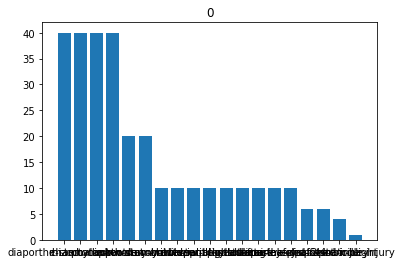

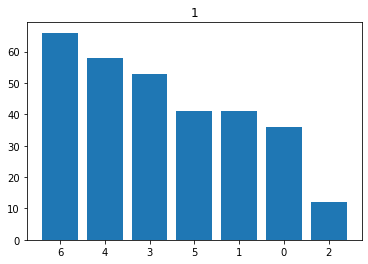

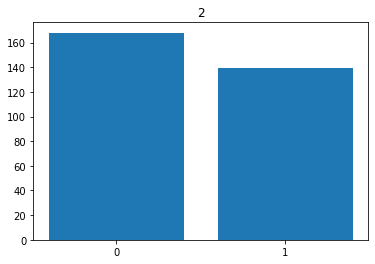

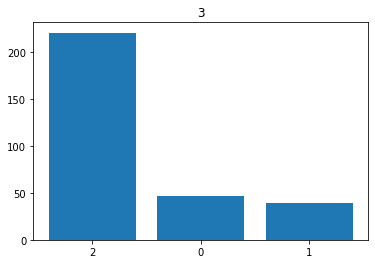

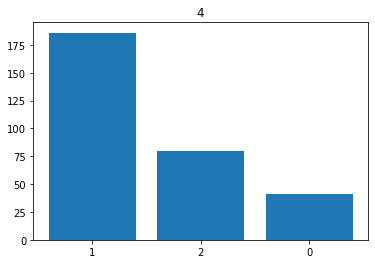

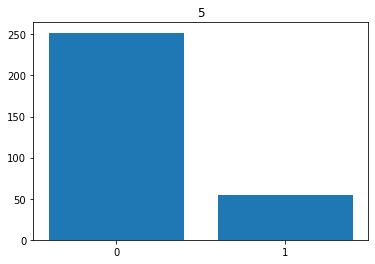

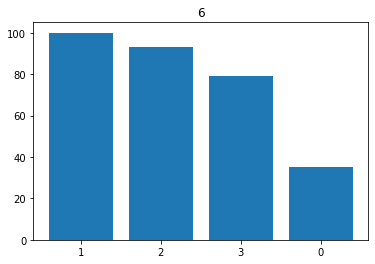

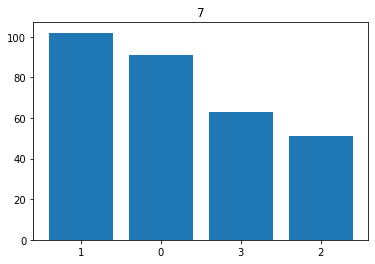

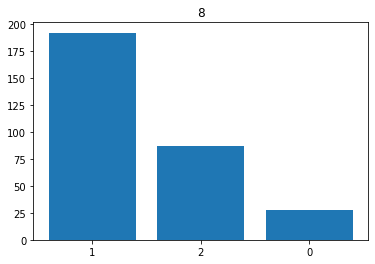

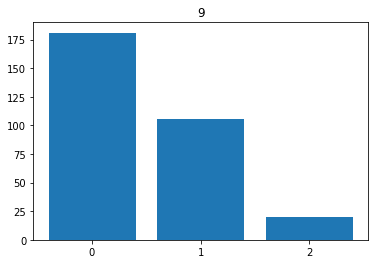

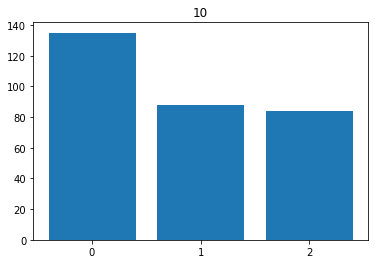

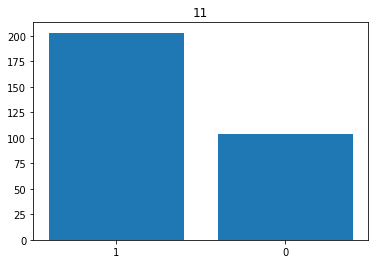

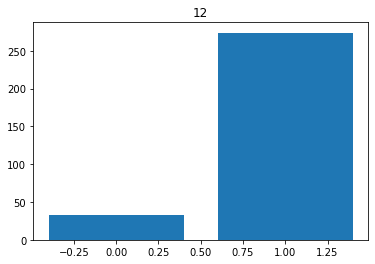

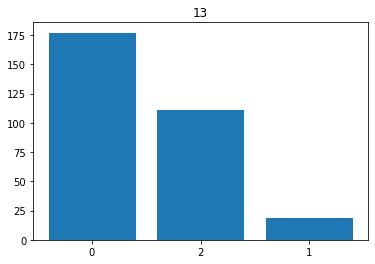

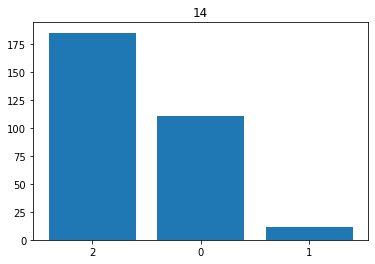

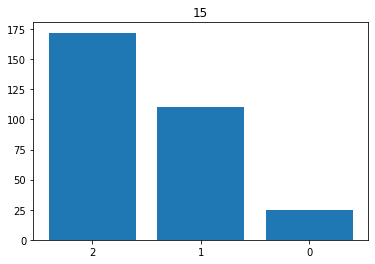

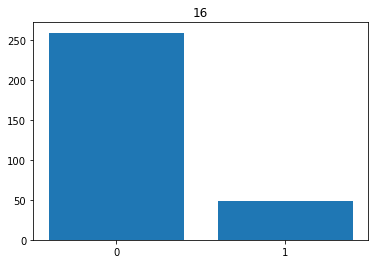

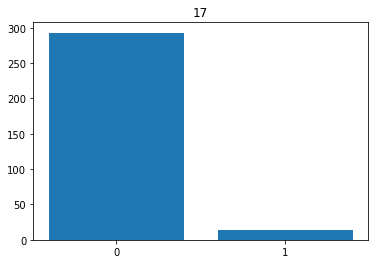

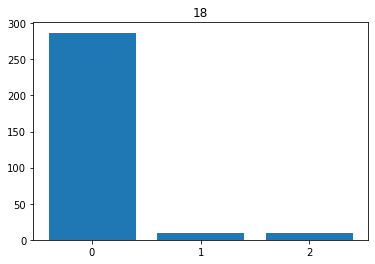

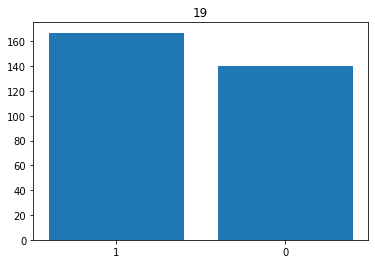

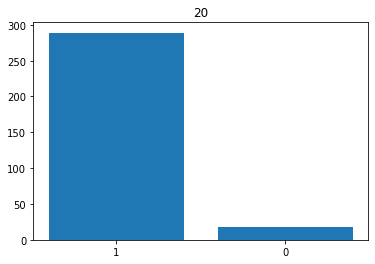

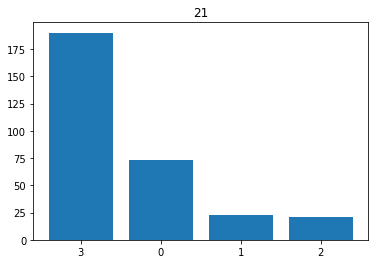

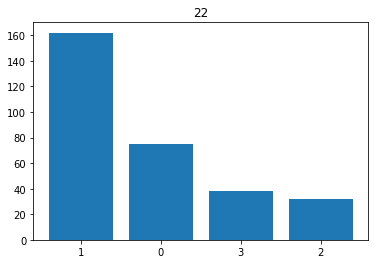

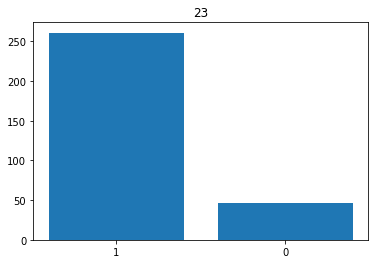

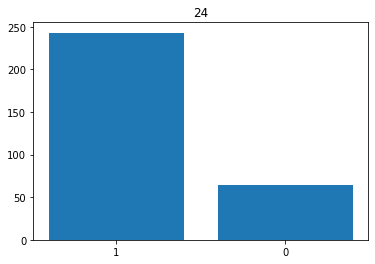

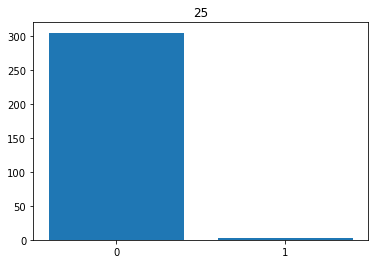

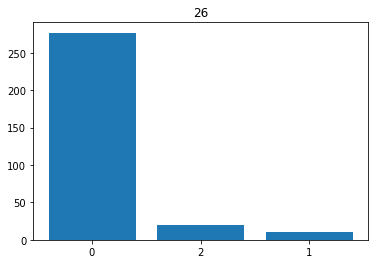

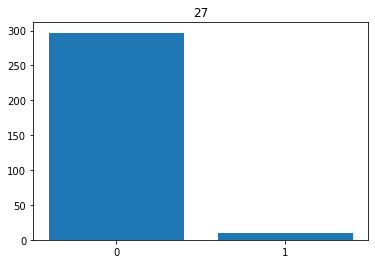

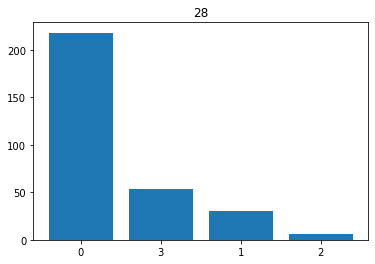

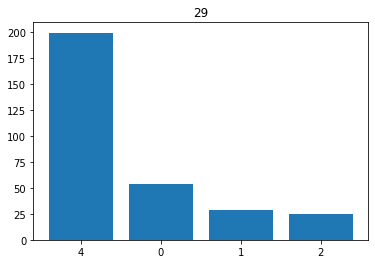

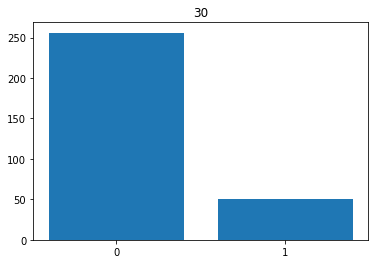

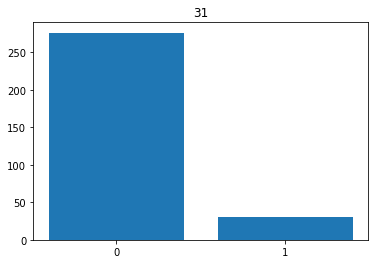

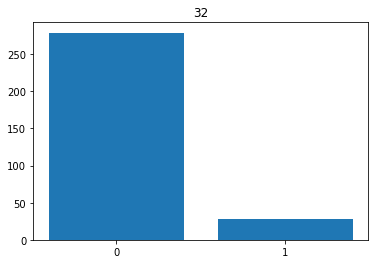

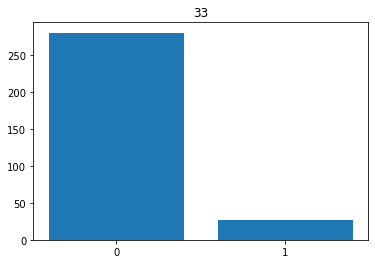

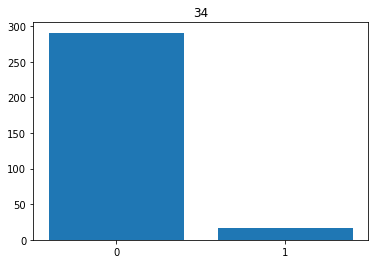

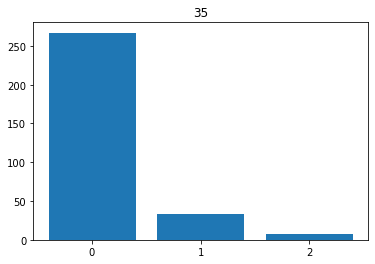

KeyError: 36

In [15]:
#Histogramas
for i in (range(len(data))):
    x_values = data1[i].unique()
    y_values = data1[i].value_counts().tolist()
    
    plt.bar(x_values, y_values)
    
    plt.title(columnas[i])
    
    plt.show()
    plt.close('all')

Respuesta 2:
Hay algunas variables que tienen un dato que predomina (que tiene más de un tipo que del otro).

### 3. ¿Hay predictores con algún tipo de asimetría y como se determinaron?
Podemos determinar el nivel de asimetría de la forma:
- Distribución altamente sesgada: si el valor del sesgo es menor a -1 o mayor a +1.
- Distrubición moderadamente sesgada: si el valor del sesgo es entre -1 y -0.5 o entre +0.5 y +1
- Distribución aproximadamente simétrica: si el valor del sesgo está entre -0.5 y +0.5


In [16]:
# Usamos el código de la práctica "ExploracionDatos" para sacar el sesgo con pandas

skewness = round(data.skew(),2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"}) 

def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Sesgo Alto'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Distribución Simétrica'
    else: return 'Sesgo Moderado'
    
skewness['skewness'] = skewness.apply(f, axis=1)

skewness

,value,skewness
1,-0.29,Distribución Simétrica
2,0.14,Distribución Simétrica
3,-1.38,Sesgo Alto
4,-0.10,Distribución Simétrica
5,1.46,Sesgo Alto
6,-0.33,Distribución Simétrica
7,-0.03,Distribución Simétrica
8,0.19,Distribución Simétrica
9,0.72,Sesgo Moderado
10,-0.03,Distribución Simétrica


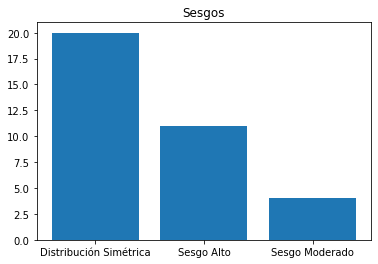

In [17]:
# Hacemos un grafico para ver de manera más fácil cuántas variables hay de cada sesgo

x_values = skewness['skewness'].unique()
y_values = skewness['skewness'].value_counts().tolist()
    
plt.bar(x_values, y_values)
    
plt.title("Sesgos")
    
plt.show()
plt.close('all')

Respuesta 3: 
Podemos ver que la mayoría de las variables tienen una Distribución Simétrica, sin embargo también hay una cantidad considerable con Sesgo Alto.

### 4. ¿Hay muestras fuera de rango (“outliers”) en el conjunto de datos? ¿Cuántas muestras están fuera de rango?

Respuesta 4: Desde mi punto de vista, al ser variables categoricas no hay datos fuera de rango (outliers), ya que son todos un número que tiene un significado , no sólo números..

### 5. ¿Hay variables con datos nulos? ¿Cuál es la variable con mayor porcentaje de datos nulos?

In [18]:
# Usemos la función de isnull() de pandas para ver si hay alguno a simple vista.

data.isnull().sum()

0      0
1      1
2      8
3     11
4      7
5     41
6      1
7      1
8     41
9     41
10    36
11     1
12     0
13    25
14    25
15    25
16    26
17    25
18    30
19     1
20    41
21    11
22    11
23    35
24    11
25    11
26    11
27    11
28    25
29    35
30    29
31    29
32    35
33    29
34    35
35     7
dtype: int64

Las únicas variables que no tienen datos NaN son '0 y 12'; no obstante, parece ser que los valores NaN que hay en cada variable no son muchos.

Saquemos el porcentaje de NaN por variable...

In [25]:
# Veamos cuál es el porcentaje de nulos por variable.

for i in columnas1:
    f =  round((data[i].isnull().sum()/len(data[i])*100), 2)
    print(f'El porcentaje de nulos en {i}: {f}%')

El porcentaje de nulos en 1: 0.33%
El porcentaje de nulos en 2: 2.61%
El porcentaje de nulos en 3: 3.58%
El porcentaje de nulos en 4: 2.28%
El porcentaje de nulos en 5: 13.36%
El porcentaje de nulos en 6: 0.33%
El porcentaje de nulos en 7: 0.33%
El porcentaje de nulos en 8: 13.36%
El porcentaje de nulos en 9: 13.36%
El porcentaje de nulos en 10: 11.73%
El porcentaje de nulos en 11: 0.33%
El porcentaje de nulos en 13: 8.14%
El porcentaje de nulos en 14: 8.14%
El porcentaje de nulos en 15: 8.14%
El porcentaje de nulos en 16: 8.47%
El porcentaje de nulos en 17: 8.14%
El porcentaje de nulos en 18: 9.77%
El porcentaje de nulos en 19: 0.33%
El porcentaje de nulos en 20: 13.36%
El porcentaje de nulos en 21: 3.58%
El porcentaje de nulos en 22: 3.58%
El porcentaje de nulos en 23: 11.4%
El porcentaje de nulos en 24: 3.58%
El porcentaje de nulos en 25: 3.58%
El porcentaje de nulos en 26: 3.58%
El porcentaje de nulos en 27: 3.58%
El porcentaje de nulos en 28: 8.14%
El porcentaje de nulos en 29: 11

Respuesta 5: Las variables que contienen un mayor número de datos nulos son, '5, 8, 9 Y 20' con un 13.36% de datos nulos, lo cual no es mucho.

### 6. Proponer una estrategia para tratar los datos nulos y explica porqué usaste esa estrategia. 

In [27]:
# Sacamos la moda de cada variable que tiene 'NaN' y la guardamos en una lista.
moda = {}

for i in columnas1:
    moda[i] = (mode(data[i]))
    
moda

{1: '5',
 2: '0',
 3: '2',
 4: '1',
 5: '0',
 6: '2',
 7: '1',
 8: '1',
 9: '0',
 10: '1',
 11: '0',
 13: '2',
 14: '0',
 15: '1',
 16: '0',
 17: '0',
 18: '0',
 19: '1',
 20: '0',
 21: '0',
 22: '0',
 23: '0',
 24: '0',
 25: '0',
 26: '0',
 27: '0',
 28: '0',
 29: '0',
 30: '0',
 31: '0',
 32: '0',
 33: '0',
 34: '0',
 35: '0'}

In [28]:
# Como ya tenemos la moda de cada variable, sustituyamos los valores 'NaN' por la moda

for i in columnas1:
    data[i] = data[i].replace(np.nan, moda[i])

data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


Respuesta 6: Use la estrategia de cambiar los valores nulos por la moda, ya que al ser datos categoricos no se puede usar ni la mediana ni el promedio. Desde mi punto de vista atacarlos con la moda es la opción más viable que conozco hasta el momento.

### 7. ¿Qué variables serían eliminados?

Respuesta 7: Ninguna, ya que no hay alguna variable que tenga más del 30 o 40% de datos nulos, al tener tan pocos datos nulos es mejor sustituir.

## Conclusiones:
- Los datos que se obtuvieron no tenían tantos problemas como esperaba, creo que hubiera estado bien saber la cantidad de datos categóricos que hay por columna, es decir ver la cantidad de veces que se repite un dato en cada columna, para así poder ver, de manera muy simple, lo que podría ver el modelo y algunos patrones.
- La variable '12' esta como enteros ya que en ella no se encontraron datos nulos, sin embargo, esta sigue siendo categorica.
- No vi la necesidad de hacer alguna estandarización o normalización.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by José Manuel Haces L.
</footer>